In [9]:
import pandas as pd
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec

## Chose how many docs you want here; 

It didnt matter for me, there was always a blob and no clear clusters

In [83]:
docs = pd.read_json('post_process_data.json')['content']
docs = [doc.split() for doc in docs]
docs = docs[:100]

In [84]:
def tag(doc_list):
    for i, doc in enumerate(doc_list):
        yield TaggedDocument(doc, [i])
tagged_docs = list(tag(docs))

In [85]:
tagged_docs[:5]

[TaggedDocument(words=['work', 'nhs', 'loads', 'job', 'go', 'vaccination', 'centre', 'convid', 'contract', 'year', 'far'], tags=[0]),
 TaggedDocument(words=['guess', 'possibility', 'cause', 'even', 'know', 'hmmmm'], tags=[1]),
 TaggedDocument(words=['hope', 'everyone', 'recover_quickly'], tags=[2]),
 TaggedDocument(words=['great', 'job', 'crush', 'virus', 'another', 'lie', 'nolte_1_dead_coronavirus', '60_biden'], tags=[3]),
 TaggedDocument(words=['archive', 'uk', 'gov', 'version', 'dec', 'see', 'section_46', 'genuinely', 'try', 'stop', 'viral', 'spread', 'screenshot'], tags=[4])]

In [86]:
model = Doc2Vec(vector_size=50, min_count=5, epochs=40)
model.build_vocab(tagged_docs)

In [88]:
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [89]:
X = model.dv[range(len(model.dv))]

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

result = pca.fit_transform(X)

pca_df = pd.DataFrame(result, columns = ['x','y'])
#pca_df['doc'] = list(model.dv.key_to_index.keys())

In [91]:
pca_df.head()

,x,y
0,0.016016,0.007472
1,0.005742,-0.010489
2,-0.007172,-0.009885
3,-0.020163,0.001631
4,-0.006813,0.018229


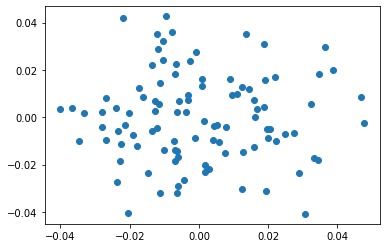

In [92]:
plt.scatter(pca_df['x'], pca_df['y'])
plt.show()